# NLP (Natural Language Processing)

In [1]:
import nltk

In [4]:
# Run this cell and download stopwords corpus
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## Obtain the Data
We'll be using a dataset from the [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)! 
The data contains a collection of more than 5 thousand SMS phone messages. You can check out the readme file for more info.

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis

In [7]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [9]:
df['length'] = df['message'].apply(len)
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Data Visualization

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

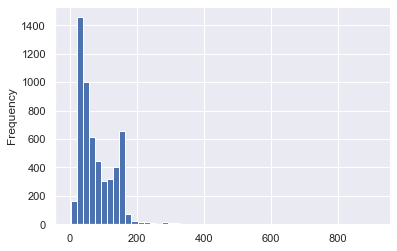

In [11]:
df['length'].plot(bins=50, kind='hist')

In [12]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [13]:
df[df['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13c92f550>,
      dtype=object)

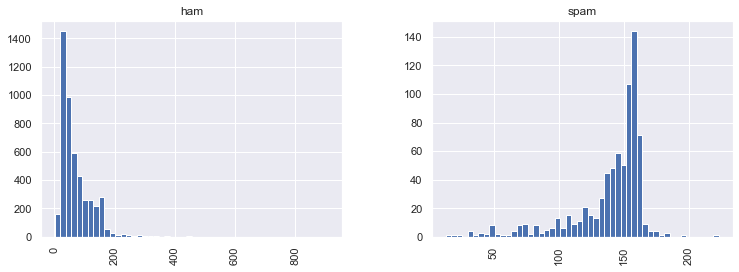

In [14]:
df.hist(column='length', by='label', bins=50,figsize=(12,4))

## Text Pre-processing

In [16]:
import string
msg = 'Hello World! This is my first message'
text_only = msg.translate(str.maketrans('', '', string.punctuation))

In [75]:
text_only = text_only.lower()

In [77]:
text_only

'hello world this is my first message'

In [23]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [78]:
filtered_msg = [word for word in text_only.split() if word not in stopwords.words('english')]

In [73]:
filtered_msg

['hello', 'world', 'this', 'first', 'message']

In [80]:
def process_text(msg):
    text = msg.translate(str.maketrans('', '', string.punctuation)).lower()
    stop_words = set(stopwords.words('english'))
    word_tokens = text.split()
    return [w for w in word_tokens if not w in stop_words]
    

In [81]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [82]:
df['message'].apply(process_text).head()

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

In [84]:
bow_transformer = CountVectorizer(analyzer=process_text).fit(df['message'])

In [85]:
len(bow_transformer.vocabulary_)

9530

In [89]:
msg4 = df['message'][3]

In [90]:
msg4

'U dun say so early hor... U c already then say...'

In [91]:
bow4 = bow_transformer.transform([msg4])

In [92]:
print(bow4)
print(bow4.shape)

  (0, 1129)	1
  (0, 1910)	1
  (0, 3002)	1
  (0, 3023)	1
  (0, 4219)	1
  (0, 7208)	2
  (0, 8626)	2
(1, 9530)


In [93]:
bow_transformer.get_feature_names()[7208]

'say'

In [94]:
bow_transformer.get_feature_names()[8626]

'u'

In [95]:
msg_bow = bow_transformer.transform(df['message'])

In [96]:
msg_bow.shape

(5572, 9530)

In [42]:
msg_bow.nnz

56024

In [97]:
sparsity = (100.0 * msg_bow.nnz / (msg_bow.shape[0] * msg_bow.shape[1]))
print(f'sparsity: {sparsity:.4f}')

sparsity: 0.0944


**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

In [45]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(msg_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9746)	0.5385626262927564
  (0, 7378)	0.4389365653379857
  (0, 6414)	0.3187216892949149
  (0, 6396)	0.29953799723697416
  (0, 5453)	0.29729957405868723
  (0, 4821)	0.26619801906087187
  (0, 4221)	0.40832589933384067


In [53]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


In [56]:
messages_tfidf = tfidf_transformer.transform(msg_bow)
print(messages_tfidf.shape)

(5572, 11617)


## Training a model

In [59]:
from sklearn.naive_bayes import MultinomialNB
spam_detector = MultinomialNB().fit(messages_tfidf, df['label'])

In [61]:
print('predicted:', spam_detector.predict(tfidf4)[0])
print('expected:', df.label[3])

predicted: ham
expected: ham


## Model Evaluation

In [62]:
all_predictions = spam_detector.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [63]:
from sklearn.metrics import classification_report
print (classification_report(df['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.84      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In the above "evaluation",we evaluated accuracy on the same data we used for training. **You should never actually evaluate on the same dataset you train on!**

Such evaluation tells us nothing about the true predictive power of our model. If we simply remembered each example during training, the accuracy on training data would trivially be 100%, even though we wouldn't be able to classify any new messages.

A proper way is to split the data into a training/test set, where the model only ever sees the **training data** during its model fitting and parameter tuning. The **test data** is never used in any way. This is then our final evaluation on test data is representative of true predictive performance.

## Train Test Split

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(df['message'], df['label'], test_size=0.2)

print(len(X_train), len(X_test), len(y_train) + len(y_test))

4457 1115 5572


The test size is 20% of the entire dataset (1115 messages out of total 5572), and the training is the rest (4457 out of 5572). Note the default split would have been 30/70.

## Creating a Data Pipeline

Let's run our model again and then predict off the test set. We will use SciKit Learn's [pipeline](http://scikit-learn.org/stable/modules/pipeline.html) capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use. Let's see an example of how it works:

In [67]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=process_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [69]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function process_text at 0x13f87a3b0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [70]:
y_predict = pipeline.predict(X_test)

In [71]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.98      1013
        spam       0.69      1.00      0.82       102

    accuracy                           0.96      1115
   macro avg       0.84      0.98      0.90      1115
weighted avg       0.97      0.96      0.96      1115

